<a href="https://colab.research.google.com/github/Monserrat321/Monserrat321/blob/main/Proyecto_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Proyecto Final, código.</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h2 align="center"><i>Predicción de la region en caso de  un ataque terrorista en el continente americano.</i></h2>
   <h5 align="center"> <i> Monserrat Herrera Hernández / No.Cuenta 315104941</i></h5>
 
  <h5 align="center"><i>Materia: Proyecto 1.</i></h5>
  </font>
  

In [61]:
#----Importamos las librerias que utilizaremos----#
#===========================================#
#Tratamiento de datos
import numpy as np 
import pandas as pd 

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Procesamiento y modelado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [4]:
#-------Cargamos los datos
df=pd.read_csv("/content/globalterrorism.csv", encoding = "ISO-8859-1") 

#-------Para tener un poco de informacion del archivo, como la dimension.
df.info #---Tenemos 181691 filas y 135 columnas.
#-------Mostramos los primeros 5 registros del archivo
df.head() #Mostramos las primeras 5 filas de nuestro data frame.

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
'''Como estamos interesados en los ataques terroristas
contra el continente americano, vamos a filtrar
el archivo con los datos que nos interesan'''

#Filtrando
datos_america = df[(df['region_txt'] == 'Central America & Caribbean') | (df['region_txt'] == 'North America')
                    | (df['region_txt'] == 'South America')]
                
datos_america.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1.0,2.0,Other Crime Type,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),22500.0,Three transformers were damaged.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN


Text(0.5, 1.0, 'Paises con mayor cantidad de ataques')

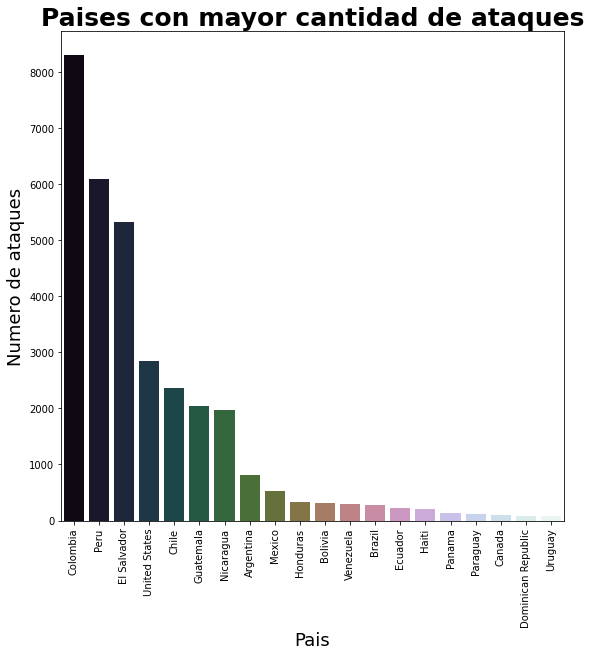

In [7]:
#Realizando un analisis visual

#=======Visualización de ataques por pais=======#
plt.rcParams["figure.figsize"] = 9, 9
sns.barplot(x = datos_america["country_txt"].value_counts()[:20].index, y=datos_america["country_txt"].value_counts()[:20].values,palette="cubehelix")
plt.ylabel("Numero de ataques", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Pais", fontsize=18)
plt.title("Paises con mayor cantidad de ataques", size=25, fontweight="bold")

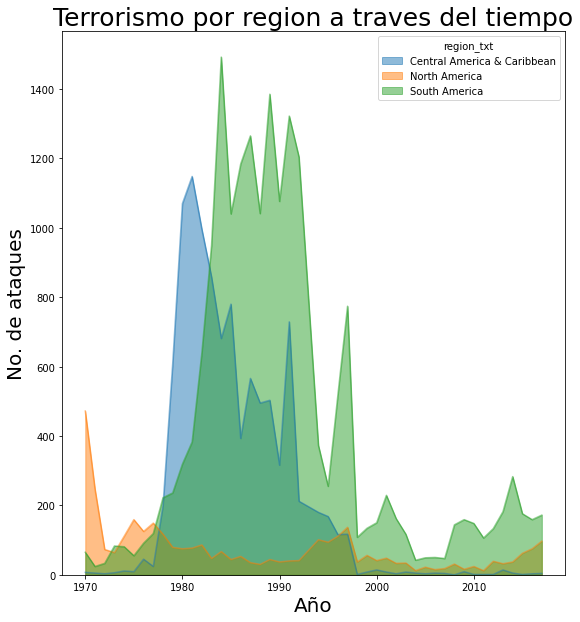

In [8]:
#=======Visualización de ataques por región======·
pd.crosstab(datos_america.iyear, datos_america.region_txt).plot(kind='area',stacked=False,figsize=(9,10))
plt.title('Terrorismo por region a traves del tiempo',fontsize=25)
plt.ylabel('No. de ataques',fontsize=20)
plt.xlabel("Año",fontsize=20)
plt.show()

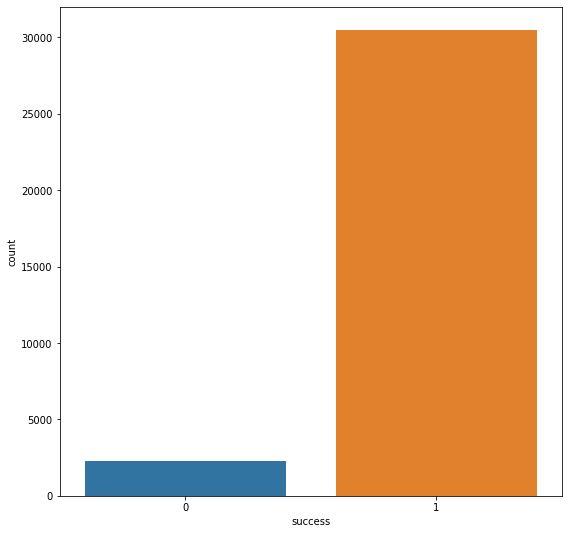

In [9]:
sns.countplot(x = 'success', data = datos_america)

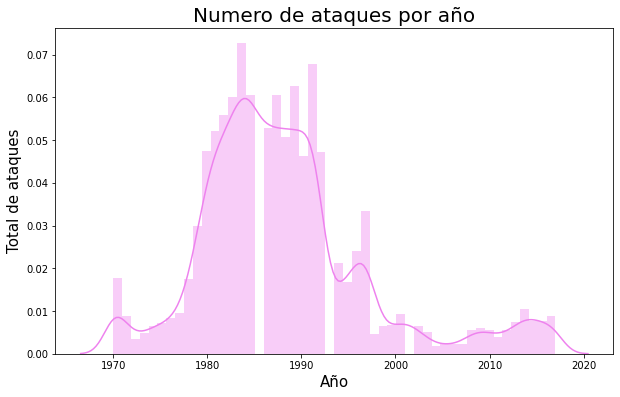

In [14]:
#numero de ataques
plt.figure(figsize=(10,6))
fig = sns.distplot(datos_america["iyear"].values, color = 'violet')
fig.set_xlabel("Año",size=15)
fig.set_ylabel("Total de ataques",size=15)
plt.title('Numero de ataques por año',size = 20)
plt.show()

In [24]:
import plotly.express as px

#to avoid lagging, only show the first 1k instead of the 180,000 data points.
geog = datos_america.head(2500)
geog = geog[['latitude','longitude']]
fig = px.scatter_geo(geog, lat='latitude', lon='longitude')

fig.show()

In [29]:
from pandas import DataFrame


weapons = datos_america['weaptype1_txt'].value_counts()
weapons = DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Armas utilizadas', 'Conteo']
weapons

,Armas utilizadas,Conteo
0,Explosives,13804
1,Firearms,12886
2,Unknown,3236
3,Incendiary,2409
4,Melee,270
5,Chemical,54
6,Sabotage Equipment,39
7,Biological,25
8,Other,24
9,Vehicle (not to include vehicle-borne explosiv...,22


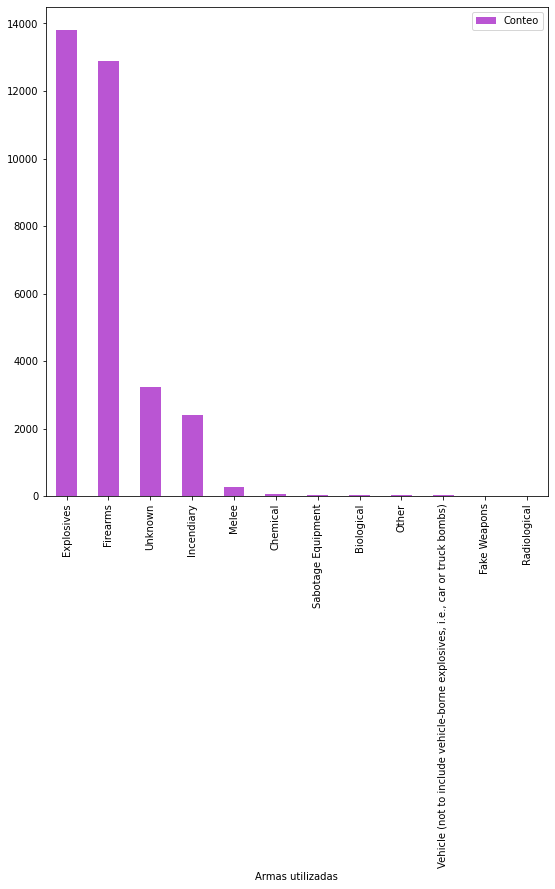

In [30]:
weapons.plot.bar(x='Armas utilizadas', y='Conteo', rot=90, color = 'mediumorchid')

Text(0.5, 1.0, 'Numero de ataques por grupo')

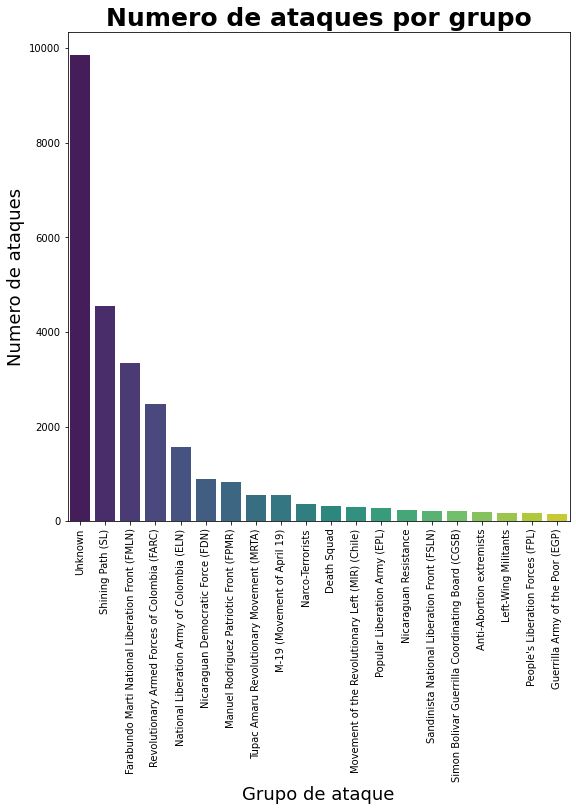

In [31]:
#-------Visualizacion de ataques por grupo, se muestra el top 20
plt.rcParams["figure.figsize"] = 9, 9
sns.barplot(x = datos_america["gname"].value_counts()[:20].index, y=datos_america["gname"].value_counts()[:20].values,palette="viridis")
plt.ylabel("Numero de ataques", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Grupo de ataque", fontsize=18)
plt.title("Numero de ataques por grupo", size=25, fontweight="bold")


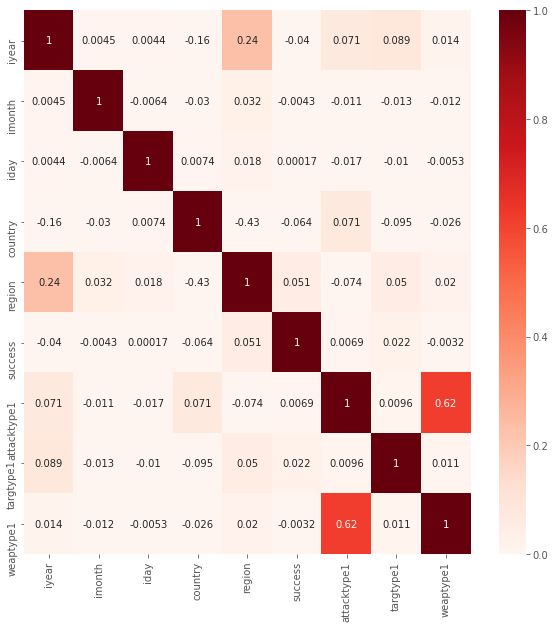

In [35]:
#Vamos a filtrar nuevamente los datos, quedandonos con los datos de nuestro interes

datos_america= datos_america[['iyear','imonth', 'iday','country', 'region', 'success', 'attacktype1','targtype1','weaptype1']]
datos_america.head()

#vemos la correlacion de variables
fig, axis = plt.subplots(figsize = (10,10))
sns.heatmap(datos_america.corr(), vmin = 0, cmap='Reds', annot = True, ax = axis)

In [38]:
#Primero intentaremos una regresion logistica, como tenemos 
#varias clases, debe ser una regresion multinomial.
#No es necesario codificar la variable respuesta porque en la columna region, ya la tenemos.

#identificamos cuantas observaciones hay de cada clase

print("Número de observaciones por clase")
print(datos_america['region'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * datos_america['region'].value_counts(normalize=True))


Número de observaciones por clase
3    18978
2    10344
1     3456
Name: region, dtype: int64

Porcentaje de observaciones por clase
3    57.898591
2    31.557752
1    10.543657
Name: region, dtype: float64


In [40]:
# División de los datos en train y test
# ==============================================================================
X = datos_america.drop(columns = 'region')
y = datos_america['region'].values


# Creamos muestras de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenamos el modelo
# Solucionadores disponibles {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
modelo= LogisticRegression(solver='newton-cg', max_iter=1000)
m1 = modelo.fit(X_train, y_train)

# Predecir etiquetas de clase en datos de prueba
LR3_pred_labels = modelo.predict(X_test)

# Imprimir pendiente e intersección: tenga en cuenta que cada clase tendrá su propia ecuación
# Order: (1=America del norte, 2=Centro america, 3=America sel sur)
print('Intercepta (Beta 0s): ', m1.intercept_)
print('Pendientes (Beta 1s and Beta 2s): ')
print(m1.coef_)

Intercepta (Beta 0s):  [-44.05297953 121.8211983  -77.76821877]
Pendientes (Beta 1s and Beta 2s): 
[[ 1.69590276e-02 -1.48660913e-02 -1.12986101e-03  3.38124847e-02
  -5.86705849e-01  1.19104077e-01 -1.00540561e-02 -2.20885984e-02]
 [-6.23581240e-02  2.50435303e-03 -3.24793766e-03 -1.85711353e-02
   6.29071265e-01 -7.95522232e-02  9.79032020e-03 -1.63014773e-02]
 [ 3.83203936e-02  1.23566886e-02  4.29365128e-03 -1.63501015e-02
  -4.23737780e-02 -3.95659535e-02  2.74845164e-04  3.83591125e-02]]


In [41]:
#Para ver el rendimiento del modelo
from sklearn.metrics import classification_report

# Utilice el método de puntuación para obtener la precisión del modelo
score = m1.score(X_test, y_test)
print('Precision', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, LR3_pred_labels))

Precision 0.7013422818791947
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.81      0.84       670
           2       0.64      0.32      0.43      2050
           3       0.69      0.88      0.78      3836

    accuracy                           0.70      6556
   macro avg       0.73      0.67      0.68      6556
weighted avg       0.69      0.70      0.67      6556



In [71]:
#Utilizando ahora el algoritmo de k-vecinos

knn_clf=KNeighborsClassifier(n_neighbors=5)
#print(knn_clf)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #Estos son los valores de salida previstos

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
print("======================")
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("======================")
print("Accuracy:",result2)

Confusion Matrix:
[[ 648    0   22]
 [   8 1999   43]
 [  29   42 3765]]
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       670
           2       0.98      0.98      0.98      2050
           3       0.98      0.98      0.98      3836

    accuracy                           0.98      6556
   macro avg       0.97      0.97      0.97      6556
weighted avg       0.98      0.98      0.98      6556

Accuracy: 0.9780353874313605


In [70]:
#Clasificacion SGD

sgdc = SGDClassifier(max_iter=1000, tol=0.01)
#print(sgdc)
 
sgdc.fit(X_train, y_train)

score = sgdc.score(X_train, y_train)
print("Training score: ", score) 
print('=========================')
 
ypred = sgdc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm) 
print('========================')

cr = classification_report(y_test, ypred)
print(cr)

Training score:  0.6080771870948058
[[ 544   85   41]
 [   5 1128  917]
 [  73 1448 2315]]
              precision    recall  f1-score   support

           1       0.87      0.81      0.84       670
           2       0.42      0.55      0.48      2050
           3       0.71      0.60      0.65      3836

    accuracy                           0.61      6556
   macro avg       0.67      0.66      0.66      6556
weighted avg       0.64      0.61      0.62      6556

